<a href="https://colab.research.google.com/github/angelomarcelino/machine_learning/blob/main/lista_3/q4_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install minisom

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import minmax_scale, scale
from minisom import MiniSom
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
import matplotlib.patheffects as PathEffects
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/angelomarcelino/machine_learning/main/lista_3/q3_data.csv')
atributos = data[['expectativa_de_vida', 'educacao', 'pib', 'estabilidade_politica']]
paises = data['pais']
paises.replace('Reino Unido', 'UK', inplace=True)
paises.replace('Estados Unidos', 'USA', inplace=True)

In [4]:
atributos.head()

,expectativa_de_vida,educacao,pib,estabilidade_politica
0,0.88,0.99,0.91,1.10
1,0.90,0.99,0.93,1.26
2,0.90,0.98,0.94,1.24
3,0.87,0.98,0.97,1.18
4,0.93,0.93,0.93,1.20


In [5]:
paises = [i for i in paises]
paises[:5]

['UK', 'Austrália', 'Canadá', 'USA', 'Japão']

In [6]:
feature_names = atributos.columns.to_list()
X = atributos[feature_names].values
#X = scale(X)

size = 10
som = MiniSom(
    size, size, 4,
    sigma=1.5, learning_rate=.7,
    random_seed=42,
    neighborhood_function='gaussian'
)

som.train(X, 100, verbose=True)

 [ 100 / 100 ] 100% - 0:00:00 left 
 quantization error: 0.0834893145210197


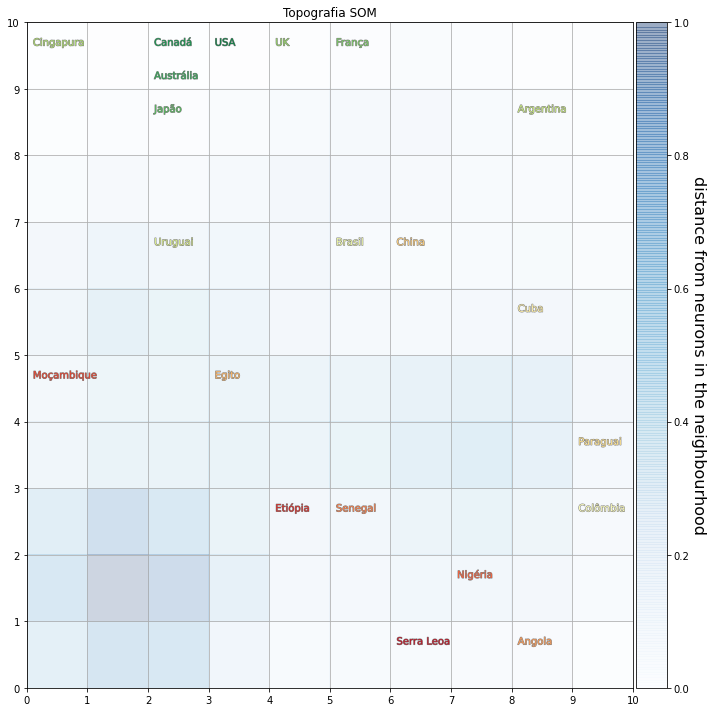

In [7]:
pib_sort = data.sort_values(by='pib', ignore_index=True)['pais']
pal = sns.color_palette("RdYlGn", len(pib_sort))
colors_dict = {c: color for c, color in zip(pib_sort, pal) }

country_map = som.labels_map(X, paises)

fig = plt.figure(figsize=(10, 10), facecolor='white')
ax = fig.add_subplot(111)

for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        txt = ax.text(x, y+off_set, c, color=colors_dict[c], fontsize=10)
        txt.set_path_effects([PathEffects.withStroke(linewidth=1, foreground='gray')])

ax.pcolor(som.distance_map().T, cmap='Blues', alpha=.2)
ax.set_xticks(np.arange(size+1))
ax.set_yticks(np.arange(size+1))
ax.grid()
ax.set_title('Topografia SOM')

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16)

plt.gcf().add_axes(ax_cb)
plt.tight_layout()
plt.savefig("topografia_som.png")